In [1]:
import matplotlib.pyplot as plt
import numpy as np

class Deck:
    def __init__(self, **kwargs):
        # All possible icon combinations
        self.icon_keys = [
            'O', 'B', 'W', 'G', 'K',
            'OO', 'BB', 'OB',
            'OG', 'BG', 'WG',
            'OK', 'KB', 'WK', 'KG', 'KK',
            'OKG', 'WOB', 'KKK', 'OKB', 'KKG',
            'b'
        ]
        # Initialize composition with all zeroes
        self.composition = {key: 0 for key in self.icon_keys}
        # Override defaults with any provided keyword arguments
        for key, value in kwargs.items():
            if key in self.composition:
                self.composition[key] = value

    def total_size(self):
        return sum(self.composition.values())

    def used_icons(self):
        return [icon for icon in self.icon_keys if self.composition[icon] > 0]


def icon_color(icon):
    colors = {
        'b': 'gainsboro',
        'W': 'whitesmoke',
        'O': 'orange',
        'B': 'dodgerblue',
        'G': 'yellowgreen',
        'K': 'dimgray'
    }
    return colors.get(icon, 'gray')


def setup_polar_plot():
    fig, ax = plt.subplots()
    ax.axis('off')
    ax = plt.axes([0.25, 0.025, 0.95, 0.95], polar=True)
    ax.set_facecolor('gainsboro')
    return fig, ax


def calculate_ring_parameters(deck, icons, ring_index, total_size):
    widths = []
    thetas = []
    radii = []
    used_icons = []

    for i, icon in enumerate(icons):
        if len(icon) > ring_index and deck.composition[icon] > 0:
            count = deck.composition[icon]
            wdt = 2 * np.pi * count / total_size
            center = 2 * np.pi * sum([deck.composition[icons[j]] for j in range(i)]) / total_size
            theta = center + wdt / 2

            widths.append(wdt)
            thetas.append(theta)
            radii.append(1)
            used_icons.append(icon)

    return widths, thetas, radii, used_icons


def draw_ring(ax, widths, thetas, radii, bottom, icons, color_index):
    bars = ax.bar(thetas, radii, width=widths, bottom=bottom)
    for i in range(len(bars)):
        bars[i].set_facecolor(icon_color(icons[i][color_index]))


def add_inner_ring_labels(ax, icons, composition, total_size):
    for i in range(len(icons)):
        if composition[icons[i]] >= 0:
            wdt = 2 * np.pi * composition[icons[i]] / total_size
            center = 2 * np.pi * sum([composition[icons[j]] for j in range(i)]) / total_size
            shift = wdt / 2
            angle = center + shift

            ax.plot([center, center], [1, 4], c='white')
            ax.text(angle, 3.8, str(composition[icons[i]]),
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=12,
                    color='black')


def finalize_plot(ax, total_size):
    ax.grid(linewidth=1.4, c='gainsboro')
    ax.text(0.5, 0.515, str(total_size),
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=16,
            color='black',
            transform=ax.transAxes)
    ax.text(0.5, 0.465, 'cards',
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=9,
            color='black',
            transform=ax.transAxes)

    ax.set_thetagrids([(360. / total_size) * i for i in range(total_size)], [])
    ax.set_rgrids([1, 2, 3, 4], [])


def plot_deck(deck: Deck):
    fig, ax = setup_polar_plot()
    total = deck.total_size()
    icons = deck.used_icons()

    # Inner ring (first icon)
    w1, t1, r1, icons1 = calculate_ring_parameters(deck, icons, 0, total)
    draw_ring(ax, w1, t1, r1, bottom=1, icons=icons1, color_index=0)
    add_inner_ring_labels(ax, icons, deck.composition, total)

    # Middle ring (second icon)
    w2, t2, r2, icons2 = calculate_ring_parameters(deck, icons, 1, total)
    draw_ring(ax, w2, t2, r2, bottom=2, icons=icons2, color_index=1)

    # Outer ring (third icon)
    w3, t3, r3, icons3 = calculate_ring_parameters(deck, icons, 2, total)
    draw_ring(ax, w3, t3, r3, bottom=3, icons=icons3, color_index=2)

    finalize_plot(ax, total)
    plt.show()


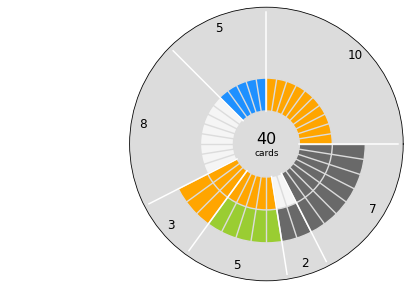

In [2]:
# Create a deck with some card counts
my_deck = Deck(O=10, B=5, W=8, OG=5, WK=2, KK=7, OO=3)

# Plot it
plot_deck(my_deck)